# Time Series Forecasting with Python (ARIMA, LSTM, Prophet)

In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet. Let's jump in and start with ARIMA.

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

## Prophet

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[Facebook's Prophet Web Page](https://facebook.github.io/prophet/)<br>
[Forecasting at Scale](https://peerj.com/preprints/3190.pdf)


# FORECAST

## Read Dataset

In [12]:
df1 = pd.read_csv('C:/Users/dell/Desktop/Data Science/Sales Forecast/sales.csv')

In [13]:
df1.head()

,SalesOrder,InvoiceAccount,InvoiceNo,InvoiceDate,ItemId,QTY,UnitPrice,BasicVal,Discount,NetVal
0,IN1S000178,IN1C101974,KARI-00030-19-20,12/04/2019,1172010,-2640.0,259.05,-683892.00,0.0,-683892.00
1,IN1S001556,IN1C102915,GJRI-00022-19-20,27/12/2019,1172010,-400.0,314.75,-125900.00,0.0,-125900.00
2,IN1S001796,IN1C103394,KARI-00032-19-20,27/12/2019,1172010,-398.0,271.72,-108144.56,0.0,-108144.56
3,IN1S002115,IN1C102397,GJRI-00023-19-20,27/12/2019,1172020,-260.0,140.66,-36571.50,0.0,-36571.50
4,IN1S003578,IN1C101448,KARI-00033-19-20,27/12/2019,1711002,-40.0,740.30,-29612.00,0.0,-29612.00


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53851 entries, 0 to 53850
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SalesOrder      53851 non-null  object 
 1   InvoiceAccount  53851 non-null  object 
 2   InvoiceNo       53851 non-null  object 
 3   InvoiceDate     53851 non-null  object 
 4   ItemId          53851 non-null  object 
 5   QTY             53851 non-null  float64
 6   UnitPrice       53850 non-null  float64
 7   BasicVal        53850 non-null  float64
 8   Discount        53850 non-null  float64
 9   NetVal          53850 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [15]:
df1.InvoiceDate = pd.to_datetime(df1.InvoiceDate)

In [16]:
df = df1[['InvoiceDate','NetVal']]

In [17]:
df = df[df['NetVal'] > 0]
df = df.set_index("InvoiceDate")
df = df.groupby(['InvoiceDate']).sum()

In [18]:
df.info()
df.head()
#df = df.set_index("InvoiceDate")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2019-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NetVal  340 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


,NetVal
InvoiceDate,
2019-01-01,8559763.80
2019-01-02,10855037.90
2019-01-03,22008095.83
2019-01-04,12508015.68
2019-01-05,19486395.70


In [23]:
#df.index.freq = 'M'
#df.date_range("2019-01-01", freq="M")

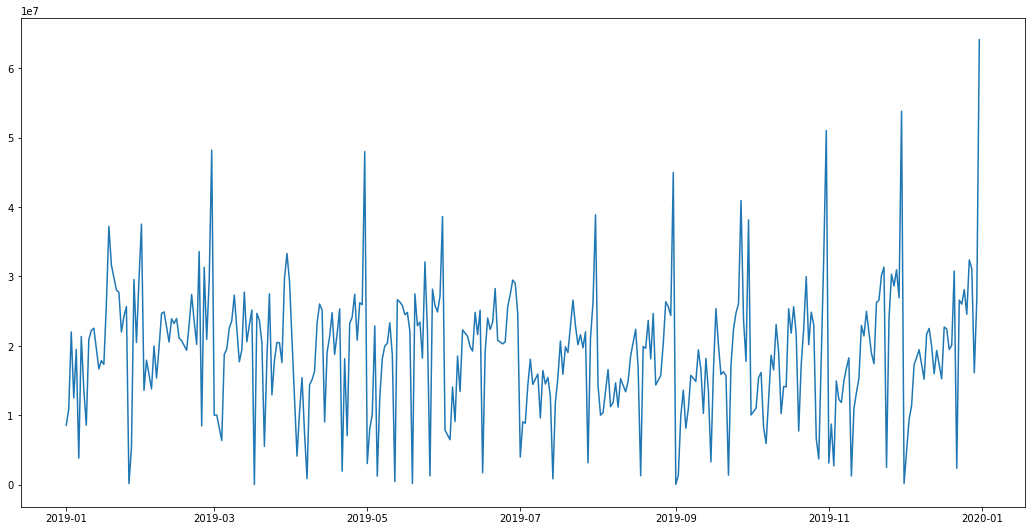

In [19]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["NetVal"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

In [24]:
#a = seasonal_decompose(df.index, model = "add")
#a.plot();

In [25]:
#import matplotlib.pyplot as plt
#plt.figure(figsize = (16,7))
#a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [44]:
auto_arima(df["NetVal"], seasonal=False, m=12,max_p=5, max_d=2,max_q=7, max_P=2, max_D=1,max_Q=2).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  340
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -5929.906
Date:                Wed, 17 Feb 2021   AIC                          11865.811
Time:                        23:26:48   BIC                          11877.298
Sample:                             0   HQIC                         11870.388
                                - 340                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.526e+07   6.24e-10   2.44e+16      0.000    1.53e+07    1.53e+07
ar.L1          0.2046      0.018     11.089      0.000       0.168       0.241
sigma2      8.242e+13   4.69e-18   1.76e+31      0.000    8.24e+13    8.24e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                77.46
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.24
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+47. Standard errors may be unstable.
"""

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

**For some reason "pmdarima" wasn't installed at Kaggle. Thats's why I couldn't use "auto_arima()" here. But you can see same output below where "arima_model" defined.**

Let's split the data into train and test set

In [28]:
train_data = df[:len(df)-20]
test_data = df[len(df)-20:]

In [32]:
train_data

,NetVal
InvoiceDate,
2019-01-01,8559763.80
2019-01-02,10855037.90
2019-01-03,22008095.83
2019-01-04,12508015.68
2019-01-05,19486395.70
...,...
2019-12-05,17311109.48
2019-12-06,18306454.36
2019-12-07,19454468.12


In [74]:
arima_model = SARIMAX(train_data['NetVal'], order = (1,0,0))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 NetVal   No. Observations:                  320
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -5642.490
Date:                Wed, 17 Feb 2021   AIC                          11288.981
Time:                        23:42:25   BIC                          11296.517
Sample:                             0   HQIC                         11291.990
                                - 320                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8495      0.021     39.838      0.000       0.808       0.891
sigma2      1.209e+14      4e-17   3.02e+30      0.000    1.21e+14    1.21e+14
===================================================================================
Ljung-Box (L1) (Q):                  46.28   Jarque-Bera (JB):               212.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -1.01
Prob(H) (two-sided):                  0.16   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [75]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1).rename("ARIMA Predictions")
arima_pred

320    1.842793e+07
321    1.565400e+07
322    1.329762e+07
323    1.129595e+07
324    9.595588e+06
325    8.151178e+06
326    6.924193e+06
327    5.881904e+06
328    4.996509e+06
329    4.244391e+06
330    3.605489e+06
331    3.062760e+06
332    2.601727e+06
333    2.210093e+06
334    1.877411e+06
335    1.594807e+06
336    1.354743e+06
337    1.150815e+06
338    9.775845e+05
339    8.304301e+05
Name: ARIMA Predictions, dtype: float64

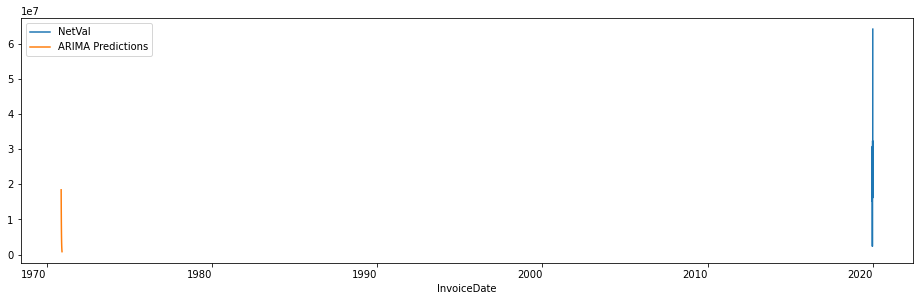

In [78]:
test_data['NetVal'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [79]:
arima_rmse_error = rmse(test_data['NetVal'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['NetVal'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 536113514832622.06
RMSE Error: 23154125.22278961
Mean: 19149915.340441175


In [80]:
test_data['ARIMA_Predictions'] = arima_pred

## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [121]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [122]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(400, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 400)               643200    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 401       
Total params: 643,601
Trainable params: 643,601
Non-trainable params: 0
_________________________________________________________________


In [123]:
lstm_model.fit_generator(generator,epochs=1000)
lstm_model.save('sales3.h5')

Epoch 1/1000
308/308 [==============================] - 11s 34ms/step - loss: 0.0369
Epoch 2/1000
308/308 [==============================] - 11s 34ms/step - loss: 0.0309
Epoch 3/1000
308/308 [==============================] - 11s 34ms/step - loss: 0.0295
Epoch 4/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0299
Epoch 5/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0297
Epoch 6/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0289
Epoch 7/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0291
Epoch 8/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0289
Epoch 9/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0288
Epoch 10/1000
308/308 [==============================] - 10s 34ms/step - loss: 0.0283
Epoch 11/1000
308/308 [==============================] - 11s 34ms/step - loss: 0.0283
Epoch 12/1000
308/308 [==============================] - 10s 33

308/308 [==============================] - 11s 37ms/step - loss: 0.0183
Epoch 97/1000
308/308 [==============================] - 12s 37ms/step - loss: 0.0185
Epoch 98/1000
308/308 [==============================] - 11s 37ms/step - loss: 0.0182
Epoch 99/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0184
Epoch 100/1000
308/308 [==============================] - 11s 34ms/step - loss: 0.0178
Epoch 101/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0176
Epoch 102/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0173
Epoch 103/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0171
Epoch 104/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0171
Epoch 105/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0166
Epoch 106/1000
308/308 [==============================] - 10s 34ms/step - loss: 0.0158
Epoch 107/1000
308/308 [==============================] - 11s

308/308 [==============================] - 11s 35ms/step - loss: 0.0029
Epoch 191/1000
308/308 [==============================] - 11s 34ms/step - loss: 0.0036
Epoch 192/1000
308/308 [==============================] - 11s 37ms/step - loss: 0.0020
Epoch 193/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0021
Epoch 194/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0030
Epoch 195/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0027
Epoch 196/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0030
Epoch 197/1000
308/308 [==============================] - 11s 36ms/step - loss: 0.0025
Epoch 198/1000
308/308 [==============================] - 10s 34ms/step - loss: 0.0019
Epoch 199/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0021
Epoch 200/1000
308/308 [==============================] - 11s 34ms/step - loss: 0.0026
Epoch 201/1000
308/308 [==============================] - 

Epoch 283/1000
308/308 [==============================] - 10s 33ms/step - loss: 0.0019
Epoch 284/1000
308/308 [==============================] - 10s 31ms/step - loss: 7.2626e-04
Epoch 285/1000
308/308 [==============================] - 10s 32ms/step - loss: 4.1031e-04
Epoch 286/1000
308/308 [==============================] - 10s 32ms/step - loss: 4.1701e-04
Epoch 287/1000
308/308 [==============================] - 10s 32ms/step - loss: 3.4976e-04
Epoch 288/1000
308/308 [==============================] - 10s 32ms/step - loss: 6.0966e-04
Epoch 289/1000
308/308 [==============================] - 10s 32ms/step - loss: 6.1469e-04
Epoch 290/1000
308/308 [==============================] - 10s 32ms/step - loss: 7.4997e-04
Epoch 291/1000
308/308 [==============================] - 10s 32ms/step - loss: 0.0016
Epoch 292/1000
308/308 [==============================] - 10s 32ms/step - loss: 0.0011
Epoch 293/1000
308/308 [==============================] - 10s 32ms/step - loss: 0.0012
Epoch 294/1000


308/308 [==============================] - 10s 32ms/step - loss: 7.2215e-04 0s - loss
Epoch 375/1000
308/308 [==============================] - 10s 34ms/step - loss: 4.3338e-04
Epoch 376/1000
308/308 [==============================] - 10s 33ms/step - loss: 3.1868e-04
Epoch 377/1000
308/308 [==============================] - 10s 32ms/step - loss: 3.4989e-04
Epoch 378/1000
308/308 [==============================] - 10s 33ms/step - loss: 4.2492e-04
Epoch 379/1000
308/308 [==============================] - 10s 31ms/step - loss: 6.7897e-04
Epoch 380/1000
308/308 [==============================] - 11s 35ms/step - loss: 5.1704e-04
Epoch 381/1000
308/308 [==============================] - 11s 35ms/step - loss: 0.0023
Epoch 382/1000
308/308 [==============================] - 11s 34ms/step - loss: 9.2196e-04
Epoch 383/1000
308/308 [==============================] - 11s 34ms/step - loss: 3.0647e-04
Epoch 384/1000
308/308 [==============================] - 10s 33ms/step - loss: 1.5158e-04
Epoch 38

308/308 [==============================] - 10s 32ms/step - loss: 3.9794e-04
Epoch 465/1000
308/308 [==============================] - 10s 32ms/step - loss: 6.1089e-04
Epoch 466/1000
308/308 [==============================] - 10s 32ms/step - loss: 0.0018
Epoch 467/1000
308/308 [==============================] - 10s 33ms/step - loss: 0.0015
Epoch 468/1000
308/308 [==============================] - 10s 33ms/step - loss: 4.2466e-04
Epoch 469/1000
308/308 [==============================] - 10s 32ms/step - loss: 2.0296e-04
Epoch 470/1000
308/308 [==============================] - 10s 34ms/step - loss: 1.1954e-04
Epoch 471/1000
308/308 [==============================] - 10s 34ms/step - loss: 8.1327e-05
Epoch 472/1000
308/308 [==============================] - 10s 33ms/step - loss: 1.1381e-04
Epoch 473/1000
308/308 [==============================] - 10s 34ms/step - loss: 2.7245e-04
Epoch 474/1000
308/308 [==============================] - 10s 33ms/step - loss: 4.9890e-04
Epoch 475/1000
308/308

308/308 [==============================] - 10s 32ms/step - loss: 2.6145e-04
Epoch 555/1000
308/308 [==============================] - 10s 34ms/step - loss: 2.2259e-04
Epoch 556/1000
308/308 [==============================] - 10s 33ms/step - loss: 1.1611e-04
Epoch 557/1000
308/308 [==============================] - 10s 33ms/step - loss: 1.2452e-04
Epoch 558/1000
308/308 [==============================] - 11s 35ms/step - loss: 2.1437e-04
Epoch 559/1000
308/308 [==============================] - 11s 35ms/step - loss: 2.8314e-04
Epoch 560/1000
308/308 [==============================] - 11s 35ms/step - loss: 3.3386e-04
Epoch 561/1000
308/308 [==============================] - 10s 33ms/step - loss: 4.4499e-04
Epoch 562/1000
308/308 [==============================] - 10s 32ms/step - loss: 5.7889e-04
Epoch 563/1000
308/308 [==============================] - 10s 32ms/step - loss: 9.5030e-04
Epoch 564/1000
308/308 [==============================] - 10s 33ms/step - loss: 3.7014e-04
Epoch 565/1000

308/308 [==============================] - 10s 32ms/step - loss: 1.2152e-04
Epoch 645/1000
308/308 [==============================] - 10s 32ms/step - loss: 7.0023e-05
Epoch 646/1000
308/308 [==============================] - 10s 33ms/step - loss: 8.6772e-05
Epoch 647/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.4355e-04
Epoch 648/1000
308/308 [==============================] - 10s 33ms/step - loss: 2.9353e-04
Epoch 649/1000
308/308 [==============================] - 10s 32ms/step - loss: 2.9551e-04
Epoch 650/1000
308/308 [==============================] - 10s 33ms/step - loss: 3.8181e-04
Epoch 651/1000
308/308 [==============================] - 10s 33ms/step - loss: 8.3788e-04
Epoch 652/1000
308/308 [==============================] - 10s 32ms/step - loss: 4.2181e-04
Epoch 653/1000
308/308 [==============================] - 10s 33ms/step - loss: 1.7627e-04
Epoch 654/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.0825e-04
Epoch 655/1000

308/308 [==============================] - 10s 32ms/step - loss: 6.6947e-04
Epoch 734/1000
308/308 [==============================] - 11s 35ms/step - loss: 4.5534e-04
Epoch 735/1000
308/308 [==============================] - 11s 36ms/step - loss: 1.7215e-04
Epoch 736/1000
308/308 [==============================] - 11s 35ms/step - loss: 1.5114e-04
Epoch 737/1000
308/308 [==============================] - 10s 33ms/step - loss: 1.1098e-04
Epoch 738/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.3022e-04
Epoch 739/1000
308/308 [==============================] - 10s 31ms/step - loss: 1.5999e-04
Epoch 740/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.9492e-04
Epoch 741/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.1350e-04
Epoch 742/1000
308/308 [==============================] - 10s 32ms/step - loss: 3.2750e-04
Epoch 743/1000
308/308 [==============================] - 10s 32ms/step - loss: 2.4654e-04
Epoch 744/1000

308/308 [==============================] - 10s 32ms/step - loss: 5.7424e-04
Epoch 823/1000
308/308 [==============================] - 10s 32ms/step - loss: 2.9500e-04
Epoch 824/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.2391e-04
Epoch 825/1000
308/308 [==============================] - 10s 31ms/step - loss: 6.7986e-05
Epoch 826/1000
308/308 [==============================] - 10s 32ms/step - loss: 5.2797e-05
Epoch 827/1000
308/308 [==============================] - 10s 32ms/step - loss: 7.0009e-05
Epoch 828/1000
308/308 [==============================] - 10s 33ms/step - loss: 9.9496e-05 0s - lo
Epoch 829/1000
308/308 [==============================] - 10s 32ms/step - loss: 9.9565e-04
Epoch 830/1000
308/308 [==============================] - 10s 31ms/step - loss: 6.0140e-04
Epoch 831/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.6738e-04
Epoch 832/1000
308/308 [==============================] - 10s 32ms/step - loss: 5.5722e-05
Epoch 

308/308 [==============================] - 10s 32ms/step - loss: 3.5058e-04
Epoch 912/1000
308/308 [==============================] - 11s 34ms/step - loss: 1.6927e-04
Epoch 913/1000
308/308 [==============================] - 11s 37ms/step - loss: 9.0951e-05
Epoch 914/1000
308/308 [==============================] - 11s 35ms/step - loss: 6.5872e-05
Epoch 915/1000
308/308 [==============================] - 11s 35ms/step - loss: 3.8637e-05
Epoch 916/1000
308/308 [==============================] - 10s 32ms/step - loss: 4.1904e-05
Epoch 917/1000
308/308 [==============================] - 10s 31ms/step - loss: 1.7527e-04
Epoch 918/1000
308/308 [==============================] - 10s 33ms/step - loss: 3.3654e-04
Epoch 919/1000
308/308 [==============================] - 10s 32ms/step - loss: 2.5572e-04
Epoch 920/1000
308/308 [==============================] - 10s 31ms/step - loss: 2.6068e-04 0s - loss: 2.550
Epoch 921/1000
308/308 [==============================] - 10s 33ms/step - loss: 1.3827e-

308/308 [==============================] - 10s 32ms/step - loss: 1.4554e-05
Epoch 1000/1000
308/308 [==============================] - 10s 32ms/step - loss: 1.1954e-05


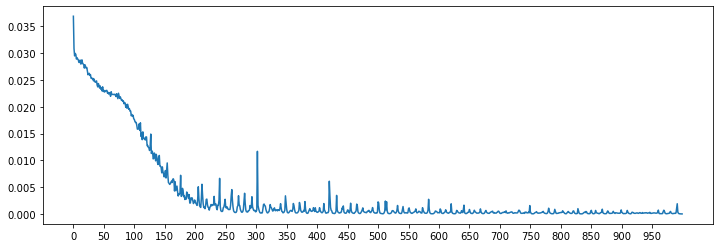

In [124]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,1000,50))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [126]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [127]:
lstm_predictions_scaled

[array([0.38271362], dtype=float32),
 array([0.31882653], dtype=float32),
 array([0.21079934], dtype=float32),
 array([0.21924958], dtype=float32),
 array([0.15143842], dtype=float32),
 array([0.2666095], dtype=float32),
 array([0.3195301], dtype=float32),
 array([0.3739669], dtype=float32),
 array([0.2278719], dtype=float32),
 array([0.17224005], dtype=float32),
 array([0.21021986], dtype=float32),
 array([0.23934788], dtype=float32),
 array([0.33757856], dtype=float32),
 array([0.31729916], dtype=float32),
 array([0.29532662], dtype=float32),
 array([0.09621993], dtype=float32),
 array([0.1292969], dtype=float32),
 array([0.2630841], dtype=float32),
 array([0.37192896], dtype=float32),
 array([0.36995414], dtype=float32)]

In [128]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [129]:
lstm_predictions

array([[20600834.63524576],
       [17163839.07689507],
       [11352195.83149425],
       [11806801.56206759],
       [ 8158698.91750921],
       [14354668.64979211],
       [17201689.88642794],
       [20130279.23281402],
       [12270664.77206498],
       [ 9277784.52380419],
       [11321021.18135206],
       [12888049.18526466],
       [18172660.63185138],
       [17081669.7280066 ],
       [15899591.89637544],
       [ 5188056.90166637],
       [ 6967530.35010834],
       [14165010.56942694],
       [20020642.07348345],
       [19914400.71280549]])

In [130]:
test_data['LSTM_Predictions'] = lstm_predictions

In [131]:
test_data

,NetVal,LSTM_Predictions,ARIMA_Predictions
InvoiceDate,,,
2019-12-11,22516702.73,2.060083e+07,NaN
2019-12-12,19929299.00,1.716384e+07,NaN
2019-12-13,15988821.50,1.135220e+07,NaN
2019-12-14,19337698.04,1.180680e+07,NaN
2019-12-16,15252818.26,8.158699e+06,NaN
2019-12-17,22717298.72,1.435467e+07,NaN
2019-12-18,22436108.44,1.720169e+07,NaN
2019-12-19,19490789.71,2.013028e+07,NaN
2019-12-20,20072463.36,1.227066e+07,NaN


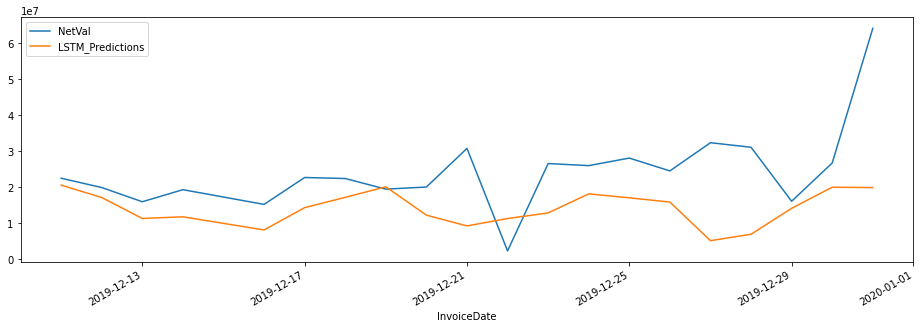

In [132]:
test_data['NetVal'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [135]:
lstm_rmse_error = rmse(test_data['NetVal'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['NetVal'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 230594056482037.66
RMSE Error: 15185323.720027758
Mean: 19149915.340441175


## Prophet Forecast

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2019-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NetVal  340 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [82]:
df_pr = df.copy()
df_pr = df.reset_index()

In [83]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [84]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [85]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [44]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [45]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.068031,130.470775,155.500651,150.997952,151.103651,-7.935845,-7.935845,-7.935845,-7.935845,-7.935845,-7.935845,0.0,0.0,0.0,143.132187
472,1995-05-01,151.003711,127.239796,152.235062,150.912016,151.055524,-11.400874,-11.400874,-11.400874,-11.400874,-11.400874,-11.400874,0.0,0.0,0.0,139.602837
473,1995-06-01,150.937247,114.697186,140.736500,150.822729,151.013459,-23.933819,-23.933819,-23.933819,-23.933819,-23.933819,-23.933819,0.0,0.0,0.0,127.003428
474,1995-07-01,150.872927,122.635699,147.540220,150.716031,150.968201,-15.749936,-15.749936,-15.749936,-15.749936,-15.749936,-15.749936,0.0,0.0,0.0,135.122992
475,1995-08-01,150.806464,129.955244,153.878732,150.629604,150.922000,-9.223559,-9.223559,-9.223559,-9.223559,-9.223559,-9.223559,0.0,0.0,0.0,141.582905


In [46]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [47]:
prophet_pred = prophet_pred.set_index("Date")

In [48]:
prophet_pred.index.freq = "MS"

In [49]:
prophet_pred

,Pred
Date,
1994-09-01,145.014244
1994-10-01,166.010984
1994-11-01,173.651126
1994-12-01,185.899777
1995-01-01,155.190582
1995-02-01,146.743233
1995-03-01,158.839055
1995-04-01,143.132187
1995-05-01,139.602837


In [50]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [51]:
import seaborn as sns

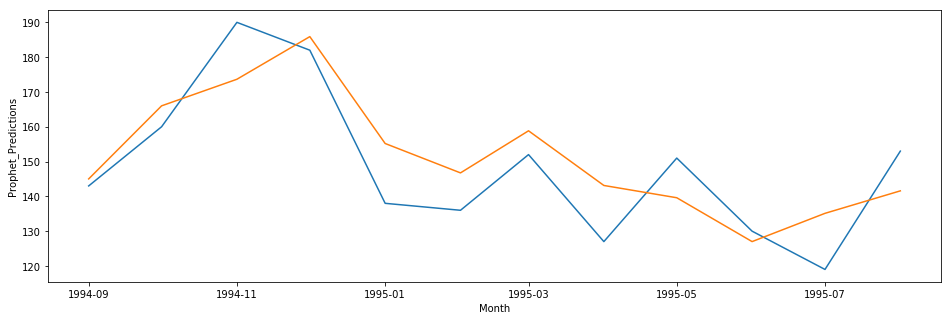

In [52]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [53]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 130.81766824441812
RMSE Error: 11.437555169021836
Mean: 136.39537815126045


In [55]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

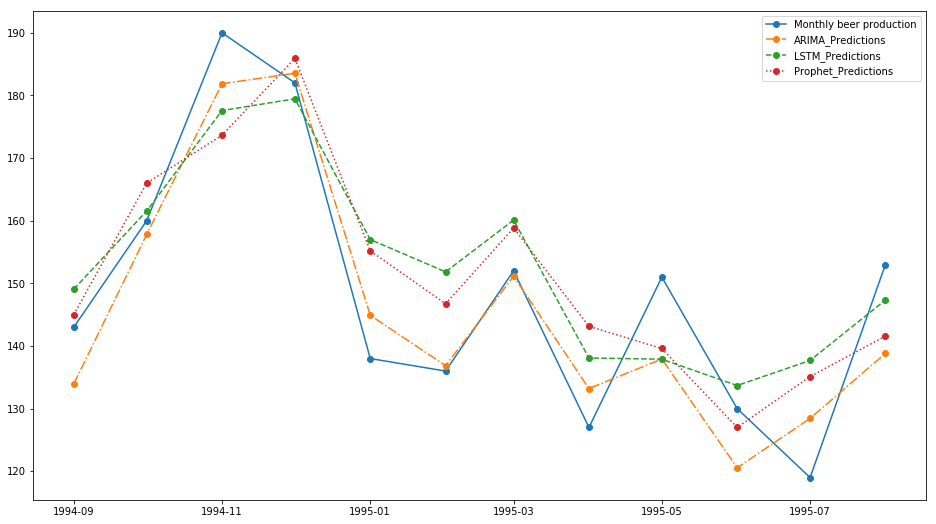

In [56]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [57]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.130837,66.110504
1,LSTM,11.427526,130.588346
2,Prophet,11.437555,130.817668


In [58]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
Month,,,,
1994-09-01,143.0,133.943955,149.067671,145.014244
1994-10-01,160.0,157.814451,161.556294,166.010984
1994-11-01,190.0,181.865146,177.589634,173.651126
1994-12-01,182.0,183.541331,179.463255,185.899777
1995-01-01,138.0,144.902539,156.998709,155.190582
1995-02-01,136.0,136.857294,151.835078,146.743233
1995-03-01,152.0,151.136283,160.101695,158.839055
1995-04-01,127.0,133.214691,138.091929,143.132187
1995-05-01,151.0,137.923012,137.892098,139.602837


Don't forget they are just quick and basic predictions so you can improve these models with tuning and according to your data and business knowledge.

<br>

Thanks!